# The big Question

Use machine learning to process and transform boston housing data to create a model. This model must predict prices of houses with 80% or greater accuracy.

## A little dive into the data

- supervised learning problem
- **Regression** problem since target is categorical
- 1460 **instances**
- 79 **features** minus 'Id'
- **target** variable is the SalePrice (the property's sale price in dollars)

**FEATURES**
MSSubClass: Identifies the type of dwelling involved in the sale.	
MSZoning: Identifies the general zoning classification of the sale.
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access to property
Alley: Type of alley access to property
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits	
Condition1: Proximity to various conditions
Condition2: Proximity to various conditions (if more than one is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Rates the overall material and finish of the house
OverallCond: Rates the overall condition of the house
YearBuilt: Original construction date
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Evaluates the quality of the material on the exterior 
ExterCond: Evaluates the present condition of the material on the exterior
Foundation: Type of foundation	
BsmtQual: Evaluates the height of the basement	
BsmtCond: Evaluates the general condition of the basement
BsmtExposure: Refers to walkout or garden level walls
BsmtFinType1: Rating of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Rating of basement finished area (if multiple types)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition	
CentralAir: Central air conditioning	
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
Kitchen: Kitchens above grade
KitchenQual: Kitchen quality 	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality (Assume typical unless deductions are warranted)	
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built		
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway	
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality	
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold (MM)
YrSold: Year Sold (YYYY)
SaleType: Type of sale	
SaleCondition: Condition of sale

**For a detailed description of the 79 features**  
**including a list of all categorical entries,** 
**see** [this file](https://www.kaggle.com/c/5407/download/data_description.txt)


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [2]:
# loading in the training and testing dataset using pandas
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# statistical description of the data
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


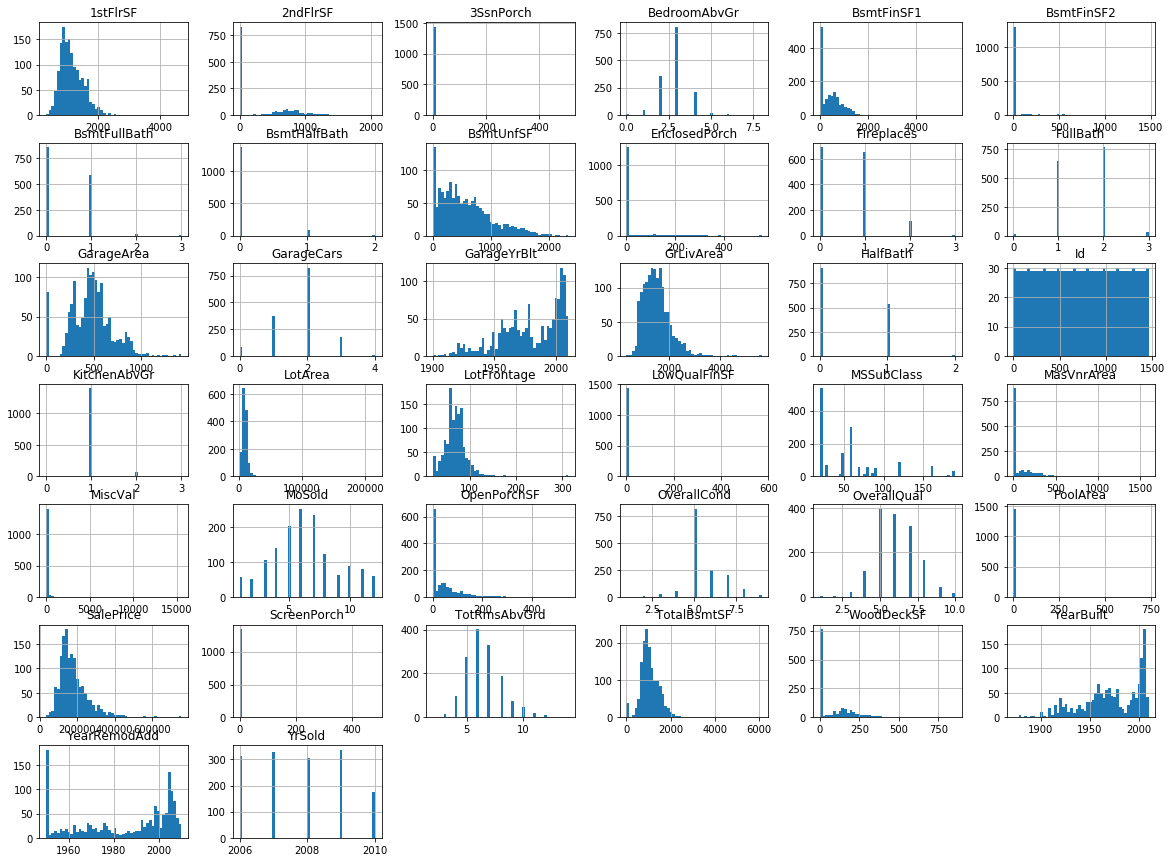

In [7]:
# histogram visualisation of features
train.hist(bins=50, figsize=(20,15))
plt.show()

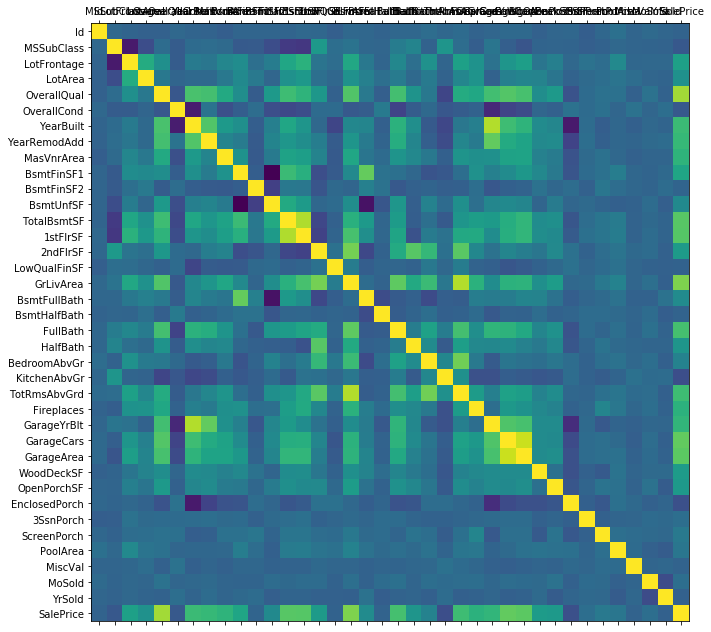

In [8]:
# graph of features correlation
corr = train.corr() #.style.background_gradient(cmap='tab20c')    
fig, ax = plt.subplots(figsize=(11, 11))
ax.matshow(corr)   
#plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.xticks(range(len(corr.columns)), corr.columns)  
plt.yticks(range(len(corr.columns)), corr.columns) 
plt.show()

In [9]:
corr['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [10]:
num_attribs= train.select_dtypes(exclude=['object', 'bool']).columns.tolist() # list of numerical attributes
cat_attribs= train.select_dtypes(include=['object', 'bool']).columns.tolist() # list of categorical attributes
date_time_attribs= train.select_dtypes(include=['datetime']).columns.tolist() # list of datetime attributes
print("Number of Numerical features: ", len(num_attribs))
print("Number of Categorical features: ", len(cat_attribs))
print("Number of DateTime features: ", len(date_time_attribs))

Number of Numerical features:  38
Number of Categorical features:  43
Number of DateTime features:  0


# Outlier Detection

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

If for some histograms the values are heavily placed in the first bin, it is good to check for outliers, either checking the min-max values of those particular features and/or explore value ranges.

In [ ]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

With __value_counts()__ function, we can increase the number of histogram bins to 10 for more bins for a more refined view of the numerical features.

In [ ]:
for c in numerical_features_all: 
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

If any outliers are identified as very likely wrong values, dropping them could improve the numerical values histograms, and later overall model performance. While a good rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, other rules for removing 'outliers' should be considered as well. For example, removing any values in the upper 1%.

In [ ]:
for c in numerical_features_all:
    print(c)
    
    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    #Q1 = df[c].quantile(0.25)
    #Q3 = df[c].quantile(0.75)
    #IQR = Q3 - Q1
    #print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    
    #dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    #dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max()*9/10].index
    df.drop(dropIndexes , inplace=True)


# Handling missing data

In [11]:
train.isnull().sum()[train.isnull().sum()!=0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [12]:
test.isnull().sum()[test.isnull().sum()!=0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [13]:
id_train= train['Id']
id_test = test['Id']  # for submissions

# the missing data in the PoolQC, MiscFeature, Alley, Fence column is too much,
# and Id is useless so we drop them
train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
test.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [15]:
num_attribs= train.select_dtypes(exclude=['object', 'bool']).columns.tolist() # list of numerical attributes
cat_attribs= train.select_dtypes(include=['object', 'bool']).columns.tolist() # list of categorical attributes
num_attribs_test= test.select_dtypes(exclude=['object', 'bool']).columns.tolist() # list of numerical attributes

In [16]:
#categorical features
imputer =  SimpleImputer(strategy='most_frequent')
train[cat_attribs] = imputer.fit_transform(train[cat_attribs])
test[cat_attribs] = imputer.fit_transform(test[cat_attribs])

#numerical features
imputer2 = SimpleImputer(strategy="median")
#imputer = SimpleImputer(strategy='constant', fill_value = "Missing")
#imputer = SimpleImputer(strategy='mean')
train[num_attribs] = imputer2.fit_transform(train[num_attribs])
test[num_attribs_test] = imputer2.fit_transform(test[num_attribs_test])

In [17]:
# encoding categorical features
labelEnc=LabelEncoder()
for col in cat_attribs:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

In [18]:
corr_matrix= train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
HeatingQC      -0.400178
GarageFinish   -0.537242
KitchenQual    -0.589189
BsmtQual       -0.618025
ExterQual      -0.636884
Name: SalePrice, Length: 76, dtype: float64

## train, val, test split

In [19]:
from sklearn.model_selection import train_test_split

target="SalePrice"
y= train[target]
X= train.drop(target, axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test= test

#### Target balancing

In [ ]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

__Important note:__ We want to fix the imbalance only in training set. We shouldn't change the validation and test sets, as these should follow the original distribution.

In [ ]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [ ]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))

## 5. <a name="5">Data processing with Pipeline</a>
(<a href="#0">Go to top</a>)

In a typical machine learning workflow you will need to apply data transformations, like imputation and scaling shown here, at least twice. First on the training dataset with __.fit()__ and __.transform()__, when preparing the data to training the model. And again, on any new data you want to predict on, with _-.transform()__. Scikit-learn [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) is a tool that simplifies this process by enforcing the implementation and order of data processing steps. 

We build a pipeline to impute the missing values with the mean using sklearn's SimpleImputer, scale the numerical features to have similar orders of magnitude by bringing them into the 0-1 range with sklearn's MinMaxScaler, and finally train an estimator [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on the imputed and scaled dataset. 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

# Pipeline desired data transformers, along with an estimator at the end
# For each step specify: a name, the actual transformer/estimator with its parameters
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
classifier

In [ ]:
# Get train data to train the classifier
X_train = train_data[numerical_features_all]
y_train = train_data[model_target]

# Fit the classifier to training data
# Train data going through the Pipeline it's first imputed, then scaled, and finally used to fit the estimator
classifier.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

In [20]:
std_scaler = StandardScaler()
X_train_prep = std_scaler.fit_transform(X_train)
X_val_prep= std_scaler.fit_transform(X_val)
X_test_prep = std_scaler.fit_transform(X_test)

In [21]:
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)
print(y_train.shape)
print(y_val.shape)

(1168, 75)
(292, 75)
(1459, 75)
(1168,)
(292,)


## Model creation

In [22]:
from Ml_models_getter import Ml_regression_getter

In [23]:
m= Ml_regression_getter(X_train_prep, y_train, X_val_prep, y_val)

In [24]:
m.models_getter()

			training			validating
  NAME		 RMSE		ACCURACY	  RMSE		ACCURACY	 CV_MEAN (CV_STD)
-------------------------------------------------------------------------------------------------------------------------------
lin_reg:	30269.852420	84.638172	2973353506348550.500000	-115260170622617413222400.000000	7576802158367165.000000 (22730406475009148.000000)
-------------------------------------------------------------------------------------------------------------------------------
tree_reg:	0.000000	100.000000	40218.567184	78.911808	44768.650575 (8981.978635)
-------------------------------------------------------------------------------------------------------------------------------
forest_reg:	10992.006876	97.974295	27943.418185	89.820060	29542.680404 (7420.476037)
-------------------------------------------------------------------------------------------------------------------------------
svm_reg:	78933.026614	-4.457542	88639.226397	-2.432573	78486.299124 (8723.324878)
-----------------

In [25]:
m.ensemble_models_getter()

Learning rate set to 0.040124
0:	learn: 75126.6730466	total: 214ms	remaining: 3m 33s
1:	learn: 73398.1337885	total: 224ms	remaining: 1m 51s
2:	learn: 71661.4564341	total: 235ms	remaining: 1m 18s
3:	learn: 69981.0830819	total: 246ms	remaining: 1m 1s
4:	learn: 68330.7058286	total: 257ms	remaining: 51.1s
5:	learn: 66629.6897884	total: 268ms	remaining: 44.4s
6:	learn: 65070.0128366	total: 279ms	remaining: 39.5s
7:	learn: 63551.0830364	total: 290ms	remaining: 35.9s
8:	learn: 62065.1071259	total: 300ms	remaining: 33.1s
9:	learn: 60696.7375506	total: 311ms	remaining: 30.8s
10:	learn: 59417.2659369	total: 322ms	remaining: 28.9s
11:	learn: 58208.8357225	total: 332ms	remaining: 27.3s
12:	learn: 56957.6514832	total: 342ms	remaining: 26s
13:	learn: 55835.4138366	total: 353ms	remaining: 24.9s
14:	learn: 54731.1007028	total: 363ms	remaining: 23.9s
15:	learn: 53643.0548556	total: 374ms	remaining: 23s
16:	learn: 52503.7911907	total: 385ms	remaining: 22.3s
17:	learn: 51528.3016912	total: 432ms	remainin

my best models are random forest(89.82) and xgboost(90.88)

## Fine-Tune Your Model

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import joblib
from sklearn.model_selection import GridSearchCV

RandomForestRegressor(n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
param_grid = [ {'n_estimators': [100, 110, 120, 130], 'max_features': np.arange(60, 77, 1)}]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(X_train_prep, y_train)

In [ ]:
print(np.sqrt(-(grid_search.best_score_)))
print(grid_search.best_params_)
print(grid_search.best_estimator_)

forest_reg:	10992.006876	97.974295	10992.006876	89.820060	29542.680404 (7420.476037)

In [ ]:
prediction = grid_search.best_estimator_.predict(X_train_prep)
mse= mean_squared_error(y_train, prediction)
rmse= np.sqrt(mse)
accuracy= grid_search.best_estimator_.score(X_train_prep, y_train)*100
val_prediction = grid_search.best_estimator_.predict(X_val_prep)
val_mse= mean_squared_error(y_val, val_prediction)
val_rmse= np.sqrt(mse)
val_accuracy= grid_search.best_estimator_.score(X_val_prep, y_val)*100
cv= cross_val_score(grid_search.best_estimator_, X_train_prep, y_train,
                            scoring='neg_mean_squared_error', cv=10)
cv_rmse = np.sqrt(-cv)

print('accuracy= ',accuracy)
print('rmse= ', rmse)
print('val_accuracy= ', val_accuracy)
print('val_rmse= ', val_rmse)
print('cv_rmse= ', cv_rmse.mean())
print('cv_std= ', cv_rmse.std())

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances